## Road to Visualization Expert
### Part 4 : Student Alcohol Consumption | Unusual Tools II

![alcohol consumption](https://www.1dental.com/blog/wp-content/uploads/2016/02/2.-Why-Do-Students-Start-Consuming-Alcohol-550x434.png)


It's a pretty fun topic. Let's enjoy it.

---

### Table of Contents

**Special Tools**

- Missing Values : `missingno`
- Waffle Charts : `pywaffle`
    - default
    - Auto Size 
    - Custom (color, fontsize, etc)
    - Icon
- Venn Diagram : `matplotlib_venn`
    - venn2, venn2_circles
    - venn3, venn3_circles
    
--- 

**More EDA with Plotly.Express**

- Dalc, Walc : Difference in Alcohol Drinking Between Daily and Weekly in Surveys
    - countplot
    - jointplot
    - lmplot(seaborn)
- Walc, Grades : Will alcohol affect my grades?
    - parallel_coordinates(parallel_categories)


In [1]:
# default
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# utiltiy
import warnings
warnings.filterwarnings('ignore')
import os 
print(os.listdir('../input/student-alcohol-consumption'))

['student-merge.R', 'student-mat.csv', 'student-por.csv']


## Check datasets & Missingno

First, let's look at the R code to get the intersection data.

In [2]:
!cat ../input/student-alcohol-consumption/student-merge.R

d1=read.table("student-mat.csv",sep=";",header=TRUE)
d2=read.table("student-por.csv",sep=";",header=TRUE)

d3=merge(d1,d2,by=c("school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"))
print(nrow(d3)) # 382 students


Import the data and do the same process

In [3]:
student_mat = pd.read_csv('../input/student-alcohol-consumption/student-mat.csv')
student_por = pd.read_csv('../input/student-alcohol-consumption/student-por.csv')
display(student_por.head())
display(student_mat.head())
print(student_mat.shape[0], student_por.shape[0])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


395 649


Check Null Data first. you can set color of missingno matrix

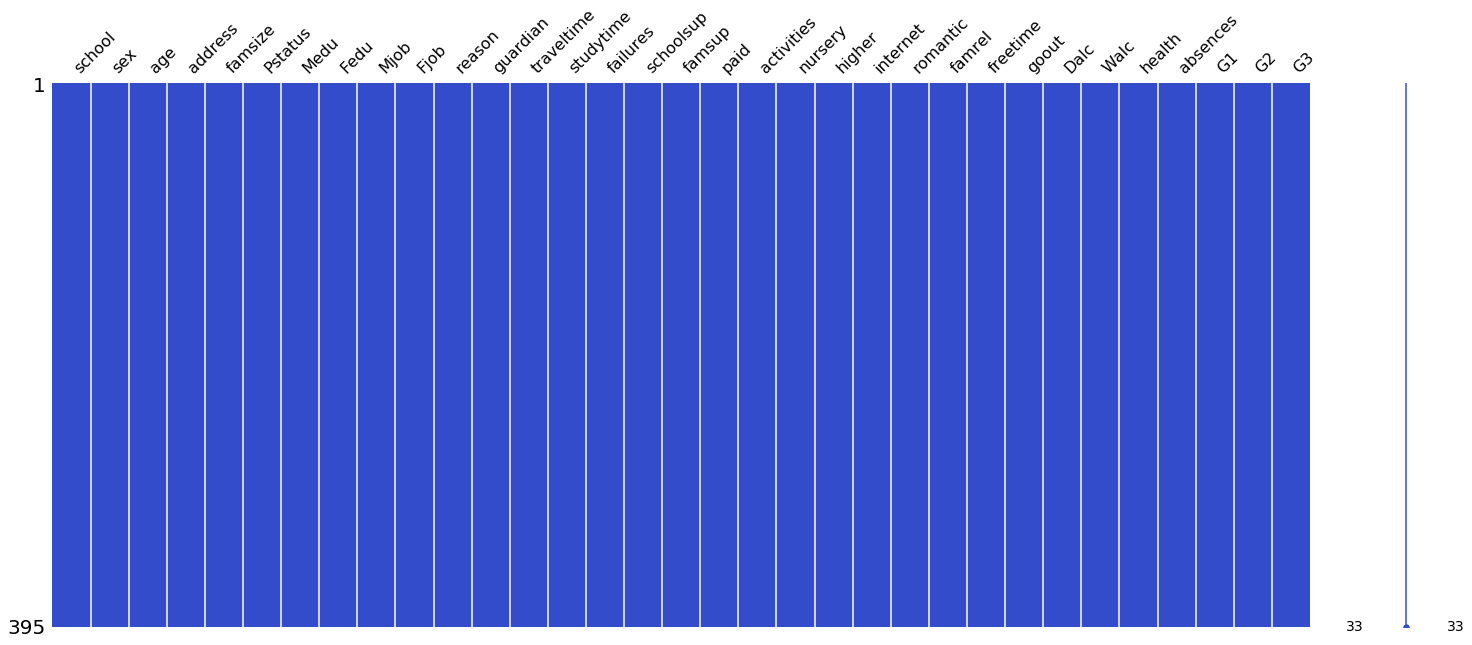

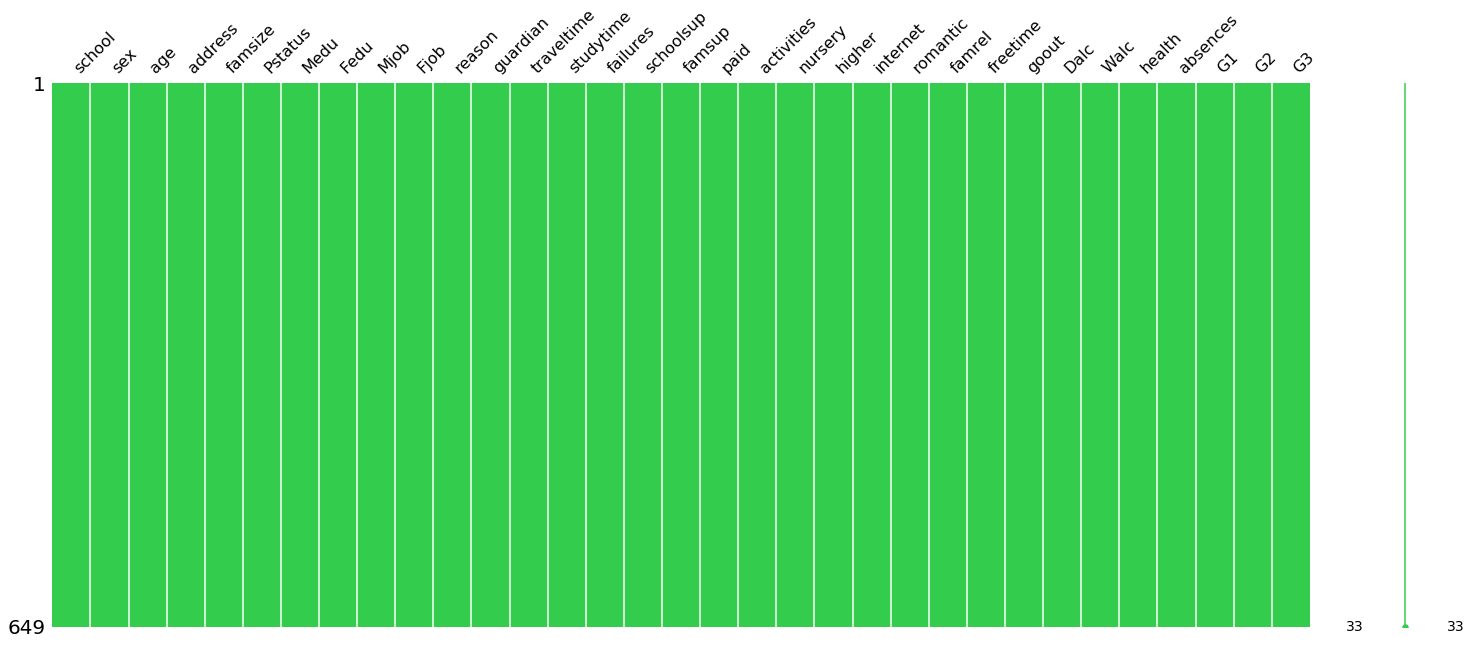

In [4]:
import missingno as msno
msno.matrix(student_mat, color = (0.2, 0.3, 0.8))
msno.matrix(student_por, color = (0.2, 0.8, 0.3))

use merge method.

In [5]:
intersect_col = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]
data = pd.merge(student_mat, student_por, 
                on=intersect_col,
                suffixes=['_mat', '_por'] )
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Waffle Charts : PyWaffle

- [PyWaffle Github](https://github.com/gyli/PyWaffle)
- [Documentation](http://pywaffle.readthedocs.io/)

**PyWaffle** is an open source, MIT-licensed Python package for plotting waffle charts.

It provides a Figure constructor class Waffle, which could be passed to matplotlib.pyplot.figure and generate a matplotlib Figure object.

In [6]:
!pip install pywaffle

     |████████████████████████████████| 532kB 4.7MB/s 


We'll plot the graph by gender.

In [7]:
data['sex'].value_counts()

F    198
M    184
Name: sex, dtype: int64

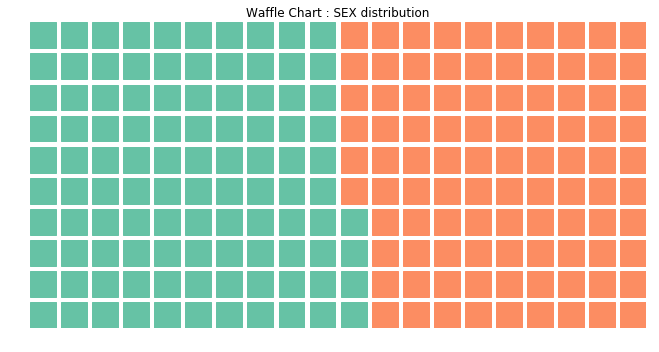

In [8]:
from pywaffle import Waffle

# type 1 : default chart
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=20, 
    values=data['sex'].value_counts(),
    figsize=(12, 5)  
)

plt.title('Waffle Chart : SEX distribution')

plt.show()

> I think this color palette is seaborn's Set2

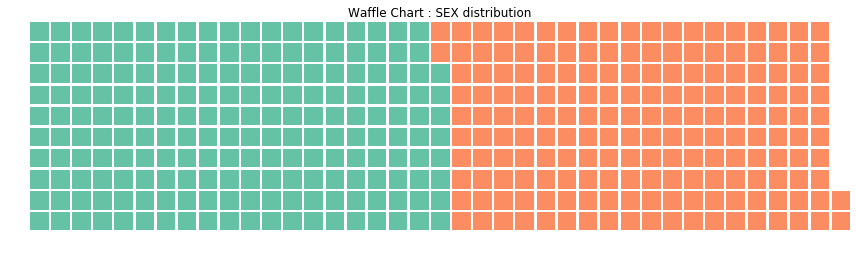

In [9]:
from pywaffle import Waffle

# type 2 : Auto-Size
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10,  
    values=data['sex'].value_counts(),
    figsize=(12, 5)  
)

plt.title('Waffle Chart : SEX distribution')

plt.show()

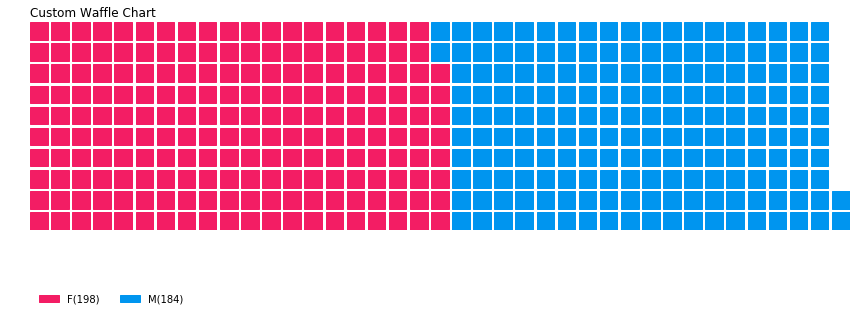

In [10]:
# type 3 : Title + Legend + Color + Direction

data_sex = data['sex'].value_counts()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data_sex,
    colors=("#F31D64", "#0095EF"),
    title={'label': 'Custom Waffle Chart', 'loc': 'left'},
    labels=["{}({})".format(a, b) for a, b in zip(data_sex.index, data_sex) ],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(12, 5),  
    icon_legend=True
)

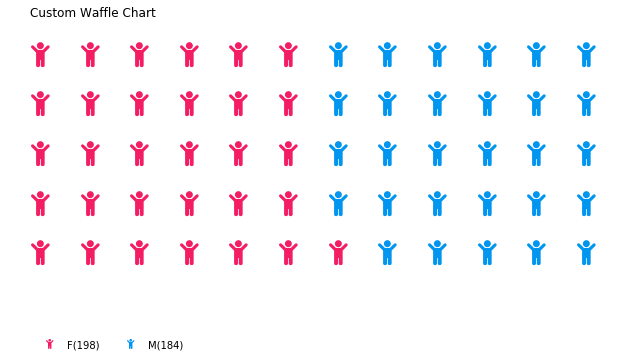

In [11]:
# type 4 : with Icon

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=12,
    values=data_sex,
    colors=("#F31D64", "#0095EF"),
    title={'label': 'Custom Waffle Chart', 'loc': 'left'},
    labels=["{}({})".format(a, b) for a, b in zip(data_sex.index, data_sex) ],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    font_size=25, 
    icons = 'child',
    figsize=(12, 5),  
    icon_legend=True
)

## Venn Diagram : matplotlib_venn

- [matplotlib-venn Github](https://github.com/konstantint/matplotlib-venn)
- [VENN DIAGRAM | the python graph gallery](https://python-graph-gallery.com/venn-diagram/)

---

- `venn2, venn2_circles`: The functions venn2 and venn2_circles accept as their only required argument a 3-element list

- `venn3, venn3_circles` : the functions venn3 and venn3_circles take a 7-element list of subset sizes 

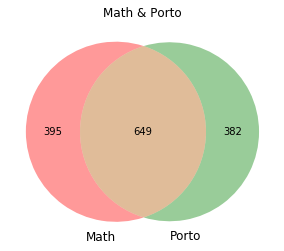

In [12]:
# type 1 : 2 subsets
from matplotlib_venn import venn2, venn2_circles
venn2(subsets = (len(student_mat), len(data), len(student_por)), set_labels = ('Math', 'Porto'))
plt.title('Math & Porto')
plt.show()

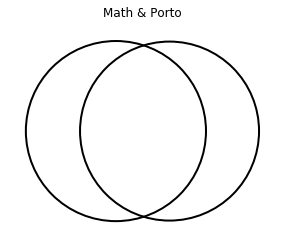

In [13]:
# type 2 : 2 subsets
venn2_circles(subsets = (len(student_mat), len(data), len(student_por)))
plt.title('Math & Porto')
plt.show()

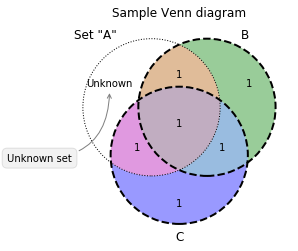

In [14]:
# type 3 : 3 subsets example code
from matplotlib_venn import venn3, venn3_circles
 
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))

v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')

c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
 

plt.title("Sample Venn diagram")
plt.annotate(
    'Unknown set', 
    xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), 
    xytext=(-70,-70),
    ha='center', 
    textcoords='offset points', 
    bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))

plt.show()


## Let's Strat EDA with px!!


## Dalc, Walc : countplot, jointplot, lmplot

In description, there are 2 features in alcohol consumption 

- **Dalc** : workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Walc** : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

Let's see if these students know how much they drink a week and how much they drink a day.

In [15]:
fig = px.histogram(student_mat, x='Dalc', y='Dalc', color='Walc')
fig.show()


These data show that there is some difference in the amount of thought between the amount of alcohol consumed per day and the amount of alcohol consumed per week.

Let's visualize this more graphically. You can do this with a jointplot.

In [16]:
import plotly.graph_objects as go

def jointplot_plotly(data, col1, col2):
    fig = go.Figure()

    fig.add_trace(go.Histogram2dContour(
        x=data[col1], y=data[col2], 
        nbinsx=30, nbinsy=30,
        colorscale = 'Blues',
        xaxis = 'x', yaxis= 'y'
    ))


    fig.add_trace(go.Scatter(
            x=data[col1], y=data[col2], 
            xaxis = 'x',
            yaxis = 'y',
            mode = 'markers',
            marker = dict(
                color = 'rgba(0,0,0,0.3)',
                size = 3
            )
        ))

    fig.add_trace(go.Histogram(
            y=data[col2], 
            xaxis = 'x2',
            marker = dict(
                color = 'rgba(0,0,0,1)'
            )
        ))

    fig.add_trace(go.Histogram(
            x=data[col1],
            yaxis = 'y2',
            marker = dict(
                color = 'rgba(0,0,0,1)'
            )
        ))

    fig.update_layout(
        autosize = False,
        xaxis = dict(
            zeroline = False,
            domain = [0,0.85],
            showgrid = False
        ),
        yaxis = dict(
            zeroline = False,
            domain = [0,0.85],
            showgrid = False
        ),
        xaxis2 = dict(
            zeroline = False,
            domain = [0.85,1],
            showgrid = False
        ),
        yaxis2 = dict(
            zeroline = False,
            domain = [0.85,1],
            showgrid = False
        ),
        height = 600,
        width = 600,
        bargap = 0,
        hovermode = 'closest',
        showlegend = False
    )

    fig.show()

In [17]:
jointplot_plotly(student_mat, 'Walc', 'Dalc')

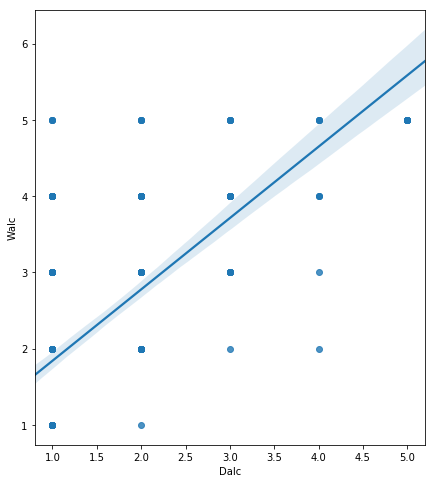

In [18]:
student_mat['Walc'] = student_mat['Walc'].apply(int)
student_mat['Dalc'] = student_mat['Dalc'].apply(int)

fig, ax = plt.subplots(1,1,figsize=(7, 8))
sns.regplot(y='Walc', x='Dalc', data=student_mat, ax=ax)

Where does the difference between Dalc and Walc come from?

But you can see that there is a clear trend.

So let's look at how alcohol consumption drove students' grades.

## Walc, Grades: Parallel Coordinates (Parallel Categories)



In [19]:
import plotly.express as px
for i in range(1, 6):
    fig = px.parallel_categories(student_mat[['Walc', 'G1', 'G2', 'G3']].query(f'Walc == {i}') )
    fig.update_layout(title=f"Weekend alcohol consumption : {i}")
    fig.show()

In [20]:
fig = px.parallel_categories(student_mat[['Walc', 'G1', 'G2', 'G3']], color='Walc' )
fig.update_layout(title=f"Weekend alcohol consumption : For All")
fig.show()